### Imports

In [1]:
import numpy as np
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
from scipy import signal
from sklearn.decomposition import FastICA, PCA

### Datasets

In [2]:
import h5py
import scipy.io
mat = scipy.io.loadmat('A01T.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug  7 13:07:03 2014',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
         -13.671875  , -43.9453125 ],
        [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
         -13.18359375, -40.52734375],
        [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
          -8.30078125, -38.57421875],
        ...,
        [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
         -40.52734375, -19.53125   ],
        [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
         -48.33984375, -12.6953125 ],
        [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
         -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
         array(['right ha

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [4]:
print(mat['data'].shape)
mat['data']

(1, 9)


array([[array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
        array(['right hand'], dtype='<U10'),
        array(['feet'], dtype='<U4'), array(['tongue'], dtype='<U6')]],
      dtype=object), array([], shape=(0, 1), dtype=uint8), array(['f

In [28]:
mat['data'][0][0]

array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
        array(['right hand'], dtype='<U10'),
        array(['feet'], dtype='<U4'), array(['tongue'], dtype='<U6')]],
      dtype=object), array([], shape=(0, 1), dtype=uint8), array(['female'],

In [50]:
print(mat['data'][0][0][0][0][0].shape)
mat['data'][0][0][0][0][0]

(29683, 25)


array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]])

In [60]:
mat['data'][0][0][0][0][0]

array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]])

### Comparing Datasets
- In order to determine whether the headset is placed properly

<AxesSubplot:>

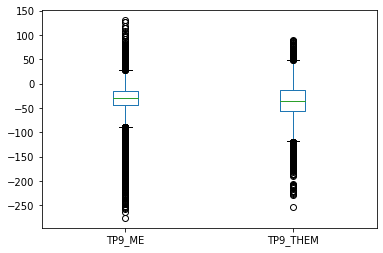

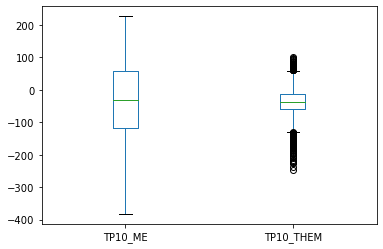

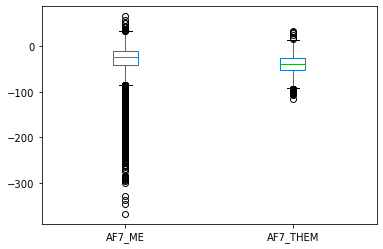

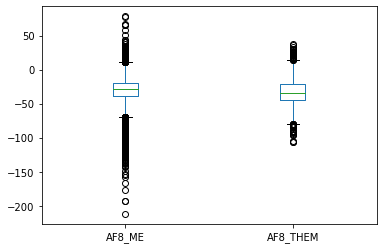

In [9]:
task = 'mining'

them_file = os.getcwd() + '/new_dataset/minecraft-state/subjectb-' + task + '-1.csv'
them = pd.read_csv(them_file)
them = them.drop(columns=['timestamps'])
# them.plot()

me_file = os.getcwd() + '/new_dataset/minecraft-state/subjectc-' + task + '-1.csv'
me = pd.read_csv(me_file)
me = me.drop(columns=['timestamps'])
# me.plot()

df = pd.DataFrame()
df['TP9_ME'] = me['TP9']
df['TP9_THEM'] = them['TP9']
df.plot(kind='box')


df = pd.DataFrame()
df['TP10_ME'] = me['TP10']
df['TP10_THEM'] = them['TP10']
df.plot(kind='box')

df = pd.DataFrame()
df['AF7_ME'] = me['AF7']
df['AF7_THEM'] = them['AF7']
df.plot(kind='box')

df = pd.DataFrame()
df['AF8_ME'] = me['AF8']
df['AF8_THEM'] = them['AF8']
df.plot(kind='box')

In [3]:
sub_a_neutral = pd.read_csv(os.getcwd() + '/eeg-feature-generation/dataset/original_data/subjecta-neutral-1.csv')
sub_a_neutral

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533058e+09,4.883,22.949,8.789,23.926,35.156
1,1.533058e+09,19.531,22.461,5.371,28.320,66.406
2,1.533058e+09,20.508,19.531,11.230,25.391,33.691
3,1.533058e+09,30.273,14.160,21.484,37.109,-31.250
4,1.533058e+09,24.902,22.461,16.602,38.086,32.715
...,...,...,...,...,...,...
15199,1.533058e+09,24.414,27.344,9.277,15.137,36.621
15200,1.533058e+09,20.020,29.785,14.160,15.137,14.648
15201,1.533058e+09,11.719,30.273,10.742,19.043,36.621
15202,1.533058e+09,13.184,30.273,1.953,17.578,35.156


In [5]:
sub_a_concentrating = pd.read_csv(os.getcwd() + '/eeg-feature-generation/dataset/original_data/subjecta-concentrating-1.csv')
sub_a_concentrating

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859


In [16]:
# starting time = 1622759567.453 (me), EEG_recording_2021-06-03-22.05.33
mult_a = pd.read_csv("multicraft_commands_a.csv")

# starting time = t=1622759995.218 (Brian)
mult_b = pd.read_csv("multicraft_commands_b.csv")


mult_a

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.622759e+15,-12.695,-13.184,-26.855,-14.160,1.0
1,1.622759e+15,-62.500,-16.602,-38.086,-62.988,1.0
2,1.622759e+15,-75.195,-19.531,-41.992,-63.965,1.0
3,1.622759e+15,-24.414,-21.973,-30.273,-24.414,1.0
4,1.622759e+15,-3.418,-25.879,-31.250,-17.090,1.0
...,...,...,...,...,...,...
11095,1.622759e+15,-68.359,-75.195,-51.270,1.000,1.0
11096,1.622759e+15,-42.969,-68.359,-36.133,1.000,1.0
11097,1.622759e+15,11.719,-37.109,-20.508,1.000,1.0
11098,1.622759e+15,-10.742,-28.320,-29.297,1.000,1.0


In [63]:
mind_wandering = pd.read_csv("mental-state.csv")
mind_wandering

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,15.762328,19.113555,23.696867,7.568395,-6.503336,6.867187,-11.955396,-16.519912,19.838319,14.333094,...,0.008537,0.008941,0.004102,0.003156,0.003659,0.010179,0.004591,0.013817,0.004536,0.0
2475,34.675582,34.200645,-57.624820,-4.825609,7.382353,2.324416,-1.341208,-4.178625,26.383597,28.782987,...,0.003324,0.003593,0.001702,0.003121,0.002686,0.001645,0.001770,0.001038,0.001973,2.0
2476,29.813809,29.623031,-86.503988,7.532121,-19.581287,-0.628400,133.947160,-2.049096,45.484851,32.163999,...,0.000754,0.000508,0.000263,0.000701,0.000797,0.001096,0.000388,0.000529,0.001079,2.0
2477,59.453973,17.944332,-10.164238,42.568211,-1.300655,-19.993690,-54.331696,12.947622,55.203380,40.228490,...,0.003332,0.003557,0.004063,0.001662,0.002665,0.002353,0.003976,0.001660,0.003229,2.0


In [68]:
mind_wandering.columns

Index(['lag1_mean_0', 'lag1_mean_1', 'lag1_mean_2', 'lag1_mean_3',
       'lag1_mean_d_h2h1_0', 'lag1_mean_d_h2h1_1', 'lag1_mean_d_h2h1_2',
       'lag1_mean_d_h2h1_3', 'lag1_mean_q1_0', 'lag1_mean_q1_1',
       ...
       'freq_669_3', 'freq_679_3', 'freq_689_3', 'freq_699_3', 'freq_709_3',
       'freq_720_3', 'freq_730_3', 'freq_740_3', 'freq_750_3', 'Label'],
      dtype='object', length=989)

### Data Cleaning for Uvicmuse GUI
Convert to readable time format, drop 'Right AUX' column

In [2]:
import datetime
def reformat_timestamp_old(df):
    for i in range(df['timestamps'].shape[0]):
#         for recently collected data
#         timestamp = datetime.datetime.fromtimestamp(df['timestamps'][i]/1000000.0)
#         df['timestamps'][i] = timestamp.strftime('%Y-%m-%d %H:%M:%S:%f')

#         for previous research data
        df['timestamps'][i] = pd.Timestamp(df['timestamps'][i], unit='s')
    df = df.drop(columns=['Right AUX'])
    return df
    
def reformat_timestamp_new(df):
    for i in range(df['timestamps'].shape[0]):
#         for recently collected data
        timestamp = datetime.datetime.fromtimestamp(df['timestamps'][i]/1000000.0)
        df['timestamps'][i] = timestamp.strftime('%Y-%m-%d %H:%M:%S:%f')
    
    df = df.drop(columns=['Right AUX'])
    return df
        
        

In [17]:
sub_a_concentrating = pd.read_csv(os.getcwd() + '/dataset/original_data/subjecta-concentrating-1.csv')
print(sub_a_concentrating.shape)
sub_a_concentrating

(15192, 6)


,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781
...,...,...,...,...,...,...
15187,1.533223e+09,25.391,33.203,-388.672,22.461,19.043
15188,1.533223e+09,35.645,33.203,-136.230,24.902,0.977
15189,1.533223e+09,48.828,31.250,258.789,38.086,-15.137
15190,1.533223e+09,50.293,31.250,264.160,39.551,-5.859


In [35]:
sub_a_concentrating = pd.read_csv(os.getcwd() + '/my_dataset/subjecta-neutral-1.csv')
print(sub_a_concentrating.shape)
sub_a_concentrating

(9504, 6)


,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.624332e+15,-47.363,-37.109,-30.273,-71.777,1.0
1,1.624332e+15,-28.809,-32.715,-45.898,-16.113,1.0
2,1.624332e+15,-13.184,-26.855,-25.391,29.785,1.0
3,1.624332e+15,-28.809,-31.738,-21.973,-25.391,1.0
4,1.624332e+15,-45.410,-14.648,-28.809,-62.988,1.0
...,...,...,...,...,...,...
9499,1.624332e+15,-57.617,-19.531,-17.578,-62.500,1.0
9500,1.624332e+15,-30.273,-41.016,-33.203,7.812,1.0
9501,1.624332e+15,-24.414,-29.297,-41.992,0.000,1.0
9502,1.624332e+15,-48.828,-4.395,-40.039,-81.543,1.0


In [37]:
sub_a_concentrating = reformat_timestamp_old(sub_a_concentrating)
sub_a_concentrating

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.624332e+09,-47.363,-37.109,-30.273,-71.777,1.0
1,1.624332e+09,-28.809,-32.715,-45.898,-16.113,1.0
2,1.624332e+09,-13.184,-26.855,-25.391,29.785,1.0
3,1.624332e+09,-28.809,-31.738,-21.973,-25.391,1.0
4,1.624332e+09,-45.410,-14.648,-28.809,-62.988,1.0
...,...,...,...,...,...,...
9499,1.624332e+09,-57.617,-19.531,-17.578,-62.500,1.0
9500,1.624332e+09,-30.273,-41.016,-33.203,7.812,1.0
9501,1.624332e+09,-24.414,-29.297,-41.992,0.000,1.0
9502,1.624332e+09,-48.828,-4.395,-40.039,-81.543,1.0


In [39]:
sub_a_concentrating = reformat_timestamp_old(sub_a_concentrating)
sub_a_concentrating

<ipython-input-38-04abfec42ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = pd.Timestamp(df['timestamps'][i], unit='s')


,timestamps,TP9,AF7,AF8,TP10
0,2021-06-22 03:27:34.287992001,-47.363,-37.109,-30.273,-71.777
1,2021-06-22 03:27:34.291898251,-28.809,-32.715,-45.898,-16.113
2,2021-06-22 03:27:34.295804501,-13.184,-26.855,-25.391,29.785
3,2021-06-22 03:27:34.299710751,-28.809,-31.738,-21.973,-25.391
4,2021-06-22 03:27:34.303617001,-45.410,-14.648,-28.809,-62.988
...,...,...,...,...,...
9499,2021-06-22 03:28:11.393460751,-57.617,-19.531,-17.578,-62.500
9500,2021-06-22 03:28:11.397367001,-30.273,-41.016,-33.203,7.812
9501,2021-06-22 03:28:11.401273251,-24.414,-29.297,-41.992,0.000
9502,2021-06-22 03:28:11.405179501,-48.828,-4.395,-40.039,-81.543


In [41]:
print(sub_a_concentrating['timestamps'][0])
print(sub_a_concentrating['timestamps'][256])

2021-06-22 03:27:34.287992001
2021-06-22 03:27:35.287992001


In [31]:
# sub_a_concentrating = reformat_timestamp_new(sub_a_concentrating)
# sub_a_concentrating
sub_a_concentrating.to_csv('sub_a_concentrating-1.csv', index=False)

In [36]:
def reformat_timestamp(df):
    for i in range(df['timestamps'].shape[0]):
        timestamp = df['timestamps'][i]/1000000.0
        df['timestamps'][i] = timestamp
    return df

In [10]:
# subjecta-concentrating-2.csv
sub_a_concentrating = reformat_timestamp_old(sub_a_concentrating)
sub_a_concentrating

<ipython-input-5-81b07a53170b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = timestamp.strftime('%Y-%m-%d %H:%M:%S:%f')


,timestamps,TP9,AF7,AF8,TP10
0,2021-06-21 23:27:34:287992,-47.363,-37.109,-30.273,-71.777
1,2021-06-21 23:27:34:291898,-28.809,-32.715,-45.898,-16.113
2,2021-06-21 23:27:34:295805,-13.184,-26.855,-25.391,29.785
3,2021-06-21 23:27:34:299711,-28.809,-31.738,-21.973,-25.391
4,2021-06-21 23:27:34:303617,-45.410,-14.648,-28.809,-62.988
...,...,...,...,...,...
9499,2021-06-21 23:28:11:393461,-57.617,-19.531,-17.578,-62.500
9500,2021-06-21 23:28:11:397367,-30.273,-41.016,-33.203,7.812
9501,2021-06-21 23:28:11:401273,-24.414,-29.297,-41.992,0.000
9502,2021-06-21 23:28:11:405180,-48.828,-4.395,-40.039,-81.543


In [12]:
sub_a_concentrating[:257]

,timestamps,TP9,AF7,AF8,TP10
0,2021-06-21 23:27:34:287992,-47.363,-37.109,-30.273,-71.777
1,2021-06-21 23:27:34:291898,-28.809,-32.715,-45.898,-16.113
2,2021-06-21 23:27:34:295805,-13.184,-26.855,-25.391,29.785
3,2021-06-21 23:27:34:299711,-28.809,-31.738,-21.973,-25.391
4,2021-06-21 23:27:34:303617,-45.410,-14.648,-28.809,-62.988
...,...,...,...,...,...
252,2021-06-21 23:27:35:272367,-28.320,-55.664,-29.785,-35.645
253,2021-06-21 23:27:35:276273,-71.777,-30.762,-50.781,-104.492
254,2021-06-21 23:27:35:280180,-52.734,-13.184,-28.809,-42.480
255,2021-06-21 23:27:35:284086,-29.785,-10.742,-37.109,11.719


In [15]:
sub_a_concentrating['timestamps'][256] - sub_a_concentrating['timestamps'][0]

1000000.0

In [18]:
# subjecta-concentrating-2.csv
sub_a_relaxed = reformat_timestamp_old(sub_a_relaxed)
sub_a_relaxed

<ipython-input-3-04abfec42ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = pd.Timestamp(df['timestamps'][i], unit='s')


,timestamps,TP9,AF7,AF8,TP10
0,2018-08-02 15:12:21.577000141,-6.348,51.758,-24.414,4.395
1,2018-08-02 15:12:21.579999924,-12.207,55.664,-65.918,3.906
2,2018-08-02 15:12:21.583999872,1.953,49.805,61.523,8.789
3,2018-08-02 15:12:21.587999821,20.508,54.688,159.180,19.531
4,2018-08-02 15:12:21.592000008,24.902,59.570,117.188,26.855
...,...,...,...,...,...
13387,2018-08-02 15:13:13.827999830,46.875,42.480,279.785,11.719
13388,2018-08-02 15:13:13.832000017,62.500,40.039,608.398,17.578
13389,2018-08-02 15:13:13.835999966,48.340,39.062,494.629,11.230
13390,2018-08-02 15:13:13.839999914,39.551,37.598,116.211,7.812


In [20]:
# subjectc-neutral-2.csv
sub_a_relaxed = reformat_timestamp_old(sub_a_relaxed)
sub_a_relaxed

<ipython-input-3-04abfec42ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = pd.Timestamp(df['timestamps'][i], unit='s')


,timestamps,TP9,AF7,AF8,TP10
0,2018-07-31 17:17:28.494999886,22.461,43.457,-33.691,22.461
1,2018-07-31 17:17:28.498999834,35.645,45.410,-8.789,29.785
2,2018-07-31 17:17:28.502999783,49.316,47.363,29.785,47.852
3,2018-07-31 17:17:28.507000208,33.691,46.387,11.719,49.316
4,2018-07-31 17:17:28.511000156,18.066,44.434,-19.531,35.645
...,...,...,...,...,...
2323,2018-07-31 17:17:37.569999933,41.504,41.504,9.766,9.766
2324,2018-07-31 17:17:37.573999882,50.781,36.621,34.668,28.320
2325,2018-07-31 17:17:37.577999830,35.156,35.645,7.812,27.344
2326,2018-07-31 17:17:37.582000017,22.949,35.156,-21.973,20.508


In [23]:
# subjectd-concentrating-2.csv
sub_a_relaxed = reformat_timestamp_old(sub_a_relaxed)
sub_a_relaxed

<ipython-input-3-04abfec42ef9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = pd.Timestamp(df['timestamps'][i], unit='s')


,timestamps,TP9,AF7,AF8,TP10
0,2018-08-02 15:18:00.516000032,55.664,1.465,-362.793,31.250
1,2018-08-02 15:18:00.519999981,52.246,5.859,-116.211,30.762
2,2018-08-02 15:18:00.523999929,47.852,10.254,-412.598,29.297
3,2018-08-02 15:18:00.527999878,37.109,8.301,-788.086,31.738
4,2018-08-02 15:18:00.531000137,43.945,3.906,-815.430,25.879
...,...,...,...,...,...
883,2018-08-02 15:18:03.967999935,35.645,35.645,-249.512,37.109
884,2018-08-02 15:18:03.972000122,51.270,41.504,163.574,41.016
885,2018-08-02 15:18:03.976000071,47.852,40.527,62.500,33.691
886,2018-08-02 15:18:03.980000019,39.062,41.016,-266.113,36.621


In [28]:
print(sub_a_relaxed['timestamps'][0])
print(sub_a_relaxed['timestamps'][256]) 

2018-08-02 15:18:00.516000032
2018-08-02 15:18:01.517000197


In [19]:
mult_a = reformat_df(mult_a)
mult_b = reformat_df(mult_b)
mult_a

<ipython-input-12-b11cf1fb8cbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamps'][i] = timestamp.strftime('%Y-%m-%d %H:%M:%S:%f')


,timestamps,TP9,AF7,AF8,TP10
0,2021-06-03 18:27:50:844858,-12.695,-13.184,-26.855,-14.160
1,2021-06-03 18:27:50:848764,-62.500,-16.602,-38.086,-62.988
2,2021-06-03 18:27:50:852671,-75.195,-19.531,-41.992,-63.965
3,2021-06-03 18:27:50:856577,-24.414,-21.973,-30.273,-24.414
4,2021-06-03 18:27:50:860483,-3.418,-25.879,-31.250,-17.090
...,...,...,...,...,...
11095,2021-06-03 18:28:34:184702,-68.359,-75.195,-51.270,1.000
11096,2021-06-03 18:28:34:188608,-42.969,-68.359,-36.133,1.000
11097,2021-06-03 18:28:34:192514,11.719,-37.109,-20.508,1.000
11098,2021-06-03 18:28:34:196421,-10.742,-28.320,-29.297,1.000


In [6]:
print(sub_a_relaxed['timestamps'][0])
print(sub_a_relaxed['timestamps'][256])

2018-07-31 17:46:32.498999834
2018-07-31 17:46:33.498999834


In [10]:
a = sub_a_relaxed['timestamps'][0:257]

0      2018-07-31 17:46:32.498999834
1      2018-07-31 17:46:32.502999783
2      2018-07-31 17:46:32.507000208
3      2018-07-31 17:46:32.511000156
4      2018-07-31 17:46:32.515000105
                   ...              
252    2018-07-31 17:46:33.482999802
253    2018-07-31 17:46:33.487000227
254    2018-07-31 17:46:33.491000175
255    2018-07-31 17:46:33.494999886
256    2018-07-31 17:46:33.498999834
Name: timestamps, Length: 257, dtype: object

In [16]:
b = sub_a_relaxed['timestamps'][0:1281]
b

0       2018-07-31 17:46:32.498999834
1       2018-07-31 17:46:32.502999783
2       2018-07-31 17:46:32.507000208
3       2018-07-31 17:46:32.511000156
4       2018-07-31 17:46:32.515000105
                    ...              
1276    2018-07-31 17:46:37.482999802
1277    2018-07-31 17:46:37.487000227
1278    2018-07-31 17:46:37.491000175
1279    2018-07-31 17:46:37.494999886
1280    2018-07-31 17:46:37.498999834
Name: timestamps, Length: 1281, dtype: object

<AxesSubplot:>

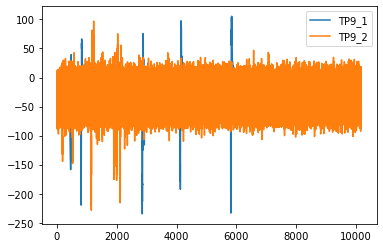

In [19]:
TP9 = pd.DataFrame()
TP9['TP9_1'] = df_brian['TP9'][:]
TP9['TP9_2'] = df_andy['TP9'][:]
TP9.plot()

<AxesSubplot:>

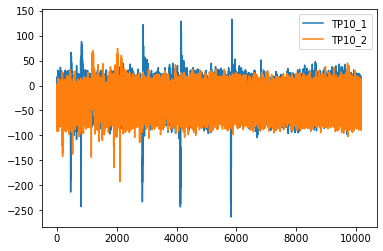

In [20]:
TP9 = pd.DataFrame()
TP9['TP10_1'] = df_brian['TP10'][:]
TP9['TP10_2'] = df_andy['TP10'][:]
TP9.plot()

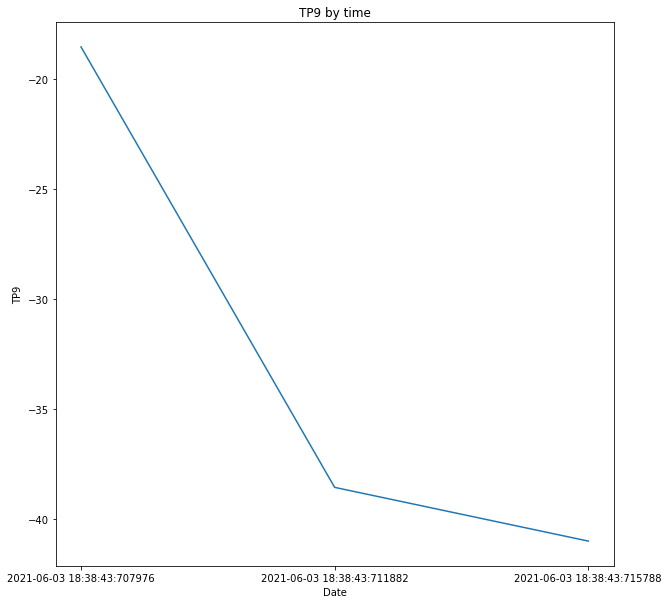

In [21]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(df_jun_1['timestamps'][0:3],
        df_jun_1['TP9'][0:3])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="TP9",
       title="TP9 by time")

plt.show()

### Trying out EEGNet Example

In [1]:
import numpy as np

# mne imports
import mne
from mne import io
from mne.datasets import sample

# EEGNet-specific imports
from EEGModels import EEGNet
from tensorflow.keras import utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

# # PyRiemann imports
# from pyriemann.estimation import XdawnCovariances
# from pyriemann.tangentspace import TangentSpace
# from pyriemann.utils.viz import plot_confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LogisticRegression

# tools for plotting confusion matrices
from matplotlib import pyplot as plt

# while the default tensorflow ordering is 'channels_last' we set it here
# to be explicit in case if the user has changed the default ordering
K.set_image_data_format('channels_last')

##################### Process, filter and epoch the data ######################
data_path = sample.data_path()

# Set parameters and read data
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
tmin, tmax = -0., 1
event_id = dict(aud_l=1, aud_r=2, vis_l=3, vis_r=4)

# Setup for reading the raw data
raw = io.Raw(raw_fname, preload=True, verbose=False)
raw.filter(2, None, method='iir')  # replace baselining with high-pass
events = mne.read_events(event_fname)

raw.info['bads'] = ['MEG 2443']  # set bad channels
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                       exclude='bads')

# Read epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                    picks=picks, baseline=None, preload=True, verbose=False)
labels = epochs.events[:, -1]

# extract raw data. scale by 1000 due to scaling sensitivity in deep learning
X = epochs.get_data()*1000 # format is in (trials, channels, samples)
y = labels

kernels, chans, samples = 1, 60, 151

# take 50/25/25 percent of the data to train/validate/test
X_train      = X[0:144,]
Y_train      = y[0:144]
X_validate   = X[144:216,]
Y_validate   = y[144:216]
X_test       = X[216:,]
Y_test       = y[216:]

############################# EEGNet portion ##################################

# convert labels to one-hot encodings.
Y_train      = np_utils.to_categorical(Y_train-1)
Y_validate   = np_utils.to_categorical(Y_validate-1)
Y_test       = np_utils.to_categorical(Y_test-1)

# convert data to NHWC (trials, channels, samples, kernels) format. Data 
# contains 60 channels and 151 time-points. Set the number of kernels to 1.
X_train      = X_train.reshape(X_train.shape[0], chans, samples, kernels)
X_validate   = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
X_test       = X_test.reshape(X_test.shape[0], chans, samples, kernels)
   
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (144, 60, 151, 1)
144 train samples
72 test samples


In [52]:
(epochs.get_data()*1000).shape


(288, 60, 151)

In [49]:
X[0:144,].shape

(144, 60, 151)

In [35]:
print(X_test.shape)
X_test

(72, 60, 151, 1)


array([[[[-4.11631316e-03],
         [-8.29285970e-03],
         [ 2.45713255e-03],
         ...,
         [ 2.82540981e-03],
         [-7.24229492e-03],
         [-9.05699126e-03]],

        [[ 1.73591666e-03],
         [-2.65686903e-03],
         [-4.01186812e-03],
         ...,
         [ 6.50473942e-03],
         [ 2.23300871e-05],
         [-8.16281579e-03]],

        [[ 1.00197622e-02],
         [ 3.63783271e-03],
         [-4.65276082e-03],
         ...,
         [ 1.55211323e-03],
         [ 5.49417113e-04],
         [-5.54101497e-03]],

        ...,

        [[ 2.51586381e-03],
         [ 4.27624090e-03],
         [ 5.51698224e-03],
         ...,
         [-2.92271948e-03],
         [-8.56333697e-04],
         [ 1.77891537e-03]],

        [[ 2.65734354e-03],
         [ 4.96029483e-03],
         [ 6.80044909e-03],
         ...,
         [-5.05274104e-03],
         [-2.23604473e-03],
         [ 3.84382427e-04]],

        [[ 2.41882694e-03],
         [ 3.83626404e-03],
         [

In [47]:
Y_test = y[286:287]
print(Y_test.shape)
Y_test

(1,)


array([1])

In [48]:
Y_test       = np_utils.to_categorical(Y_test-1)
print(Y_test.shape)
Y_test

(1, 1)


array([[1.]], dtype=float32)

In [40]:
labels[:1]

array([2])

In [36]:
print(Y_test.shape)
Y_test

(72, 4)


array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [32]:
print(y.shape)
y

(288,)


array([2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3,
       1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2,
       3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4,
       2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 4,
       2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3,
       1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2,
       3, 1, 4, 2, 3, 1, 4, 2, 3, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4,
       2, 3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1,
       4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 2, 3, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1, 4, 2, 3,
       1, 4])

In [9]:
print(epochs.events.shape)
epochs.events

(288, 3)


array([[ 6994,     0,     2],
       [ 7086,     0,     3],
       [ 7192,     0,     1],
       [ 7304,     0,     4],
       [ 7413,     0,     2],
       [ 7506,     0,     3],
       [ 7612,     0,     1],
       [ 7709,     0,     4],
       [ 7810,     0,     2],
       [ 7916,     0,     3],
       [ 8025,     0,     1],
       [ 8129,     0,     4],
       [ 8233,     0,     2],
       [ 8331,     0,     3],
       [ 8428,     0,     1],
       [ 8633,     0,     2],
       [ 8739,     0,     3],
       [ 8857,     0,     1],
       [ 8962,     0,     4],
       [ 9052,     0,     2],
       [ 9144,     0,     3],
       [ 9251,     0,     1],
       [ 9365,     0,     4],
       [ 9477,     0,     2],
       [ 9581,     0,     3],
       [ 9677,     0,     1],
       [ 9782,     0,     4],
       [ 9890,     0,     2],
       [ 9981,     0,     3],
       [10101,     0,     1],
       [10220,     0,     4],
       [10315,     0,     2],
       [10411,     0,     3],
       [10

In [13]:
print(X_train.shape)
X_train

(144, 60, 151, 1)


array([[[[ 1.14853165e-02],
         [ 2.58360850e-02],
         [ 4.46131027e-02],
         ...,
         [ 4.90674383e-03],
         [ 6.86215581e-03],
         [ 4.48163355e-03]],

        [[ 1.07937633e-02],
         [ 2.82950916e-02],
         [ 4.96569420e-02],
         ...,
         [ 1.95472200e-03],
         [ 3.88344954e-03],
         [ 6.22781972e-03]],

        [[ 8.81630700e-03],
         [ 3.09920517e-02],
         [ 5.34098594e-02],
         ...,
         [ 3.79802197e-03],
         [ 4.65307081e-03],
         [ 4.49973374e-03]],

        ...,

        [[ 7.25839930e-03],
         [ 1.13343242e-02],
         [ 1.67771623e-02],
         ...,
         [-1.02682092e-03],
         [-1.42131793e-03],
         [-1.35162984e-03]],

        [[ 8.33299258e-03],
         [ 1.26861451e-02],
         [ 1.76921101e-02],
         ...,
         [-1.55914432e-03],
         [-2.51360116e-03],
         [-3.32072131e-03]],

        [[ 6.35348021e-03],
         [ 9.46789934e-03],
         [

In [25]:
a = np.squeeze(X_train[0][0])
print(a.shape)
a
df = pd.DataFrame()

(151,)


array([ 1.14853165e-02,  2.58360850e-02,  4.46131027e-02,  6.63821379e-02,
        8.29161364e-02,  8.71511114e-02,  8.14923091e-02,  7.45494773e-02,
        7.16350922e-02,  6.98524149e-02,  6.12529403e-02,  4.20657729e-02,
        1.95778744e-02,  5.75466261e-03,  2.98202311e-03,  2.33130475e-03,
       -2.82501355e-03, -9.60634347e-03, -1.38602961e-02, -1.64355755e-02,
       -1.84359440e-02, -1.88167681e-02, -1.91084739e-02, -2.24002179e-02,
       -2.62882018e-02, -2.51355170e-02, -1.99548727e-02, -1.74911837e-02,
       -1.91853311e-02, -1.97246946e-02, -1.69546991e-02, -1.46974999e-02,
       -1.47435135e-02, -1.37505989e-02, -9.74628225e-03, -5.72190299e-03,
       -5.21837343e-03, -8.35407252e-03, -1.25728715e-02, -1.45056105e-02,
       -1.22914544e-02, -8.44928104e-03, -7.78293994e-03, -1.01972586e-02,
       -1.01224622e-02, -5.90705763e-03, -3.19865973e-03, -4.54532930e-03,
       -3.94840598e-03,  1.38270207e-03,  3.30316636e-03, -3.45508697e-03,
       -9.42712852e-03, -

<AxesSubplot:>

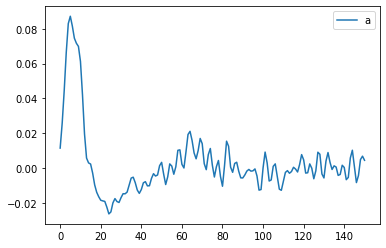

In [26]:
df['a'] = a
df.plot()

<AxesSubplot:>

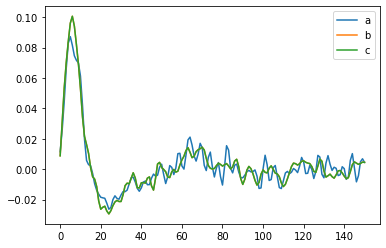

In [31]:
b = np.squeeze(X_train[0][1])
c = np.squeeze(X_train[0][2])
df['c'] = c
df.plot()

In [82]:
epochs

Number of events,288
Events,aud_l: 72aud_r: 73vis_l: 73vis_r: 70
Time range,0.000 – 0.999 sec
Baseline,off


In [85]:
print(labels.shape)
labels

(288,)


array([2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3,
       1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2,
       3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4,
       2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 4,
       2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3,
       1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2,
       3, 1, 4, 2, 3, 1, 4, 2, 3, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4,
       2, 3, 1, 4, 2, 3, 1, 4, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1,
       4, 2, 3, 1, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 2, 3, 1,
       4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 3, 1, 4, 2, 1, 4, 2, 3,
       1, 4])

In [89]:
print(X.shape)
X

(288, 60, 151)


array([[[ 1.14853165e-02,  2.58360850e-02,  4.46131027e-02, ...,
          4.90674383e-03,  6.86215581e-03,  4.48163355e-03],
        [ 1.07937633e-02,  2.82950916e-02,  4.96569420e-02, ...,
          1.95472200e-03,  3.88344954e-03,  6.22781972e-03],
        [ 8.81630700e-03,  3.09920517e-02,  5.34098594e-02, ...,
          3.79802197e-03,  4.65307081e-03,  4.49973374e-03],
        ...,
        [ 7.25839930e-03,  1.13343242e-02,  1.67771623e-02, ...,
         -1.02682092e-03, -1.42131793e-03, -1.35162984e-03],
        [ 8.33299258e-03,  1.26861451e-02,  1.76921101e-02, ...,
         -1.55914432e-03, -2.51360116e-03, -3.32072131e-03],
        [ 6.35348021e-03,  9.46789934e-03,  1.30079734e-02, ...,
         -1.25074193e-03, -1.07478992e-03,  2.28630243e-04]],

       [[-1.70566400e-03, -7.64129920e-04, -1.73134359e-03, ...,
         -1.23216824e-02, -7.90080985e-03,  5.81848673e-03],
        [-3.34716024e-03,  8.49654162e-04,  1.27247445e-03, ...,
         -4.48498600e-03, -4.72291054e

In [101]:
print(X[0].shape)
X[0]

(60, 151)


array([[ 0.01148532,  0.02583608,  0.0446131 , ...,  0.00490674,
         0.00686216,  0.00448163],
       [ 0.01079376,  0.02829509,  0.04965694, ...,  0.00195472,
         0.00388345,  0.00622782],
       [ 0.00881631,  0.03099205,  0.05340986, ...,  0.00379802,
         0.00465307,  0.00449973],
       ...,
       [ 0.0072584 ,  0.01133432,  0.01677716, ..., -0.00102682,
        -0.00142132, -0.00135163],
       [ 0.00833299,  0.01268615,  0.01769211, ..., -0.00155914,
        -0.0025136 , -0.00332072],
       [ 0.00635348,  0.0094679 ,  0.01300797, ..., -0.00125074,
        -0.00107479,  0.00022863]])

<AxesSubplot:>

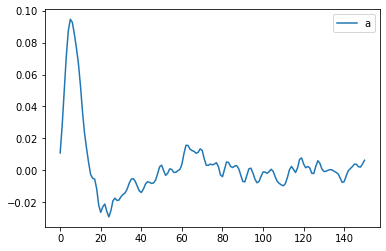

In [98]:
df = pd.DataFrame()
df['a'] = X[0][1]
df.plot()